# importer et lire les données

In [39]:
#importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

In [40]:
#read in csv files
data=pd.read_csv(r'C:/Users/grerger/Downloads/python data science books/fruit_price.csv',index_col='Date',parse_dates=True)

In [41]:
#voir quelque lignes
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [42]:
# séparer les données
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(data,test_size=0.3,random_state=42)

In [43]:
#vérifier the size
X_train.shape

(12774, 13)

In [44]:
X_train.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [45]:
X_train.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12774 entries, 2018-01-14 to 2017-02-05
Data columns (total 13 columns):
Unnamed: 0      12774 non-null int64
AveragePrice    12774 non-null float64
Total Volume    12774 non-null float64
4046            12774 non-null float64
4225            12774 non-null float64
4770            12774 non-null float64
Total Bags      12774 non-null float64
Small Bags      12774 non-null float64
Large Bags      12774 non-null float64
XLarge Bags     12774 non-null float64
type            12774 non-null object
year            12774 non-null int64
region          12774 non-null object
dtypes: float64(9), int64(2), object(2)
memory usage: 1.4+ MB


# Explore the data and engineer Features 


0.5852326268431012

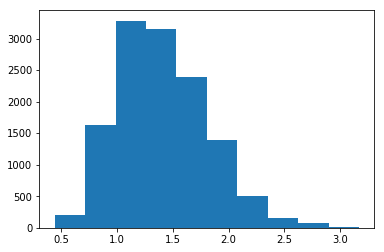

In [47]:
# voir la distibution
plt.hist(X_train.AveragePrice)
X_train.AveragePrice.skew() #biais 

0.1451430531599764

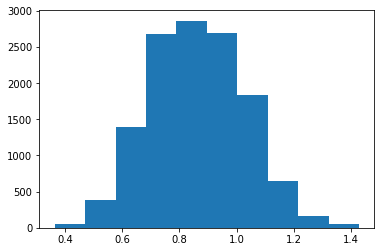

In [48]:
# voir la distibution avec np.log(x) et recalculer le biais
target=np.log(X_train.AveragePrice+1)
plt.hist(target)
target.skew()# biais à diminuer 

In [49]:
# voir les informations tels moyen var,quantile ...
X_train.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,12774.000000,12774.000000,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,12774.000000,12774.000000
mean,24.157664,1.405398,8.578282e+05,2.968289e+05,2.973973e+05,2.307094e+04,2.405289e+05,1.826416e+05,5.470759e+04,3179.740078,2016.148974
std,15.469430,0.403106,3.449748e+06,1.256147e+06,1.215377e+06,1.097369e+05,9.767171e+05,7.372479e+05,2.427490e+05,18007.714460,0.940886
min,0.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.088555e+04,8.684775e+02,3.007135e+03,0.000000e+00,5.104812e+03,2.905533e+03,1.291425e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.098331e+05,8.952065e+03,2.942765e+04,1.932900e+02,4.065019e+04,2.677275e+04,2.735810e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.340189e+05,1.132389e+05,1.508345e+05,6.242055e+03,1.119585e+05,8.375852e+04,2.283427e+04,134.557500,2017.000000
max,52.000000,3.170000,5.228870e+07,1.778761e+07,2.047057e+07,2.546439e+06,1.580470e+07,1.122805e+07,4.324231e+06,551693.650000,2018.000000


# les variables numériques

In [50]:
#renommer les variables explicatives
X_train=X_train.rename(columns={'4046':'X1','4225':'X2','4770':'X30'})
X_train.columns = X_train.columns.str.strip().str.lower().str.replace(' ', '_')
X_test=X_test.rename(columns={'4046':'X1','4225':'X2','4770':'X30'})
X_test.columns = X_test.columns.str.strip().str.lower().str.replace(' ', '_')

In [51]:
#voir que les variables numériques
numeric_features = X_train.select_dtypes(include=[np.number])
numeric_features

,unnamed:_0,averageprice,total_volume,x1,x2,x30,total_bags,small_bags,large_bags,xlarge_bags,year
Date,,,,,,,,,,,
2018-01-14,10,0.95,1316347.07,548774.22,292561.60,6066.33,468944.92,355573.55,113294.70,76.67,2018
2016-08-14,19,1.14,83933.43,24615.83,16234.66,2321.26,40761.68,40759.30,0.00,2.38,2016
2017-07-16,24,1.17,267806.51,89083.09,79805.02,1830.85,97087.55,90560.26,2757.35,3769.94,2017
2015-07-05,25,0.99,4295280.16,2713600.49,592279.23,97111.62,892288.82,621425.86,270807.26,55.70,2015
2015-07-05,24,1.58,13816.71,6430.36,4300.00,0.00,3086.35,2744.50,341.85,0.00,2015
2016-01-24,48,1.16,1261352.88,360743.21,518203.05,16918.87,365487.75,315428.95,47910.39,2148.41,2016
2016-10-23,9,1.85,584275.61,56864.06,336433.69,27036.54,163941.32,163070.93,382.89,487.50,2016
2015-07-12,24,1.84,4614.82,585.84,1449.20,538.65,2041.13,1609.25,431.88,0.00,2015
2015-09-27,13,1.10,467791.95,159459.18,152002.76,10158.38,146171.63,146143.41,13.28,14.94,2015


### Explorons ces types de relations dans l'ensemble des données

In [52]:
#affiche la corrélation entre les colonnes et examine les corrélations entre les entités et la cible.#
corr = numeric_features.corr()
corr

,unnamed:_0,averageprice,total_volume,x1,x2,x30,total_bags,small_bags,large_bags,xlarge_bags,year
unnamed:_0,1.000000,-0.124990,0.016650,0.019196,0.021985,0.041364,0.002119,0.004060,-0.003139,-0.008955,-0.180748
averageprice,-0.124990,1.000000,-0.196232,-0.213713,-0.174838,-0.180054,-0.180445,-0.178355,-0.175513,-0.119171,0.090205
total_volume,0.016650,-0.196232,1.000000,0.977190,0.974223,0.872782,0.964896,0.968668,0.884985,0.747073,0.013193
x1,0.019196,-0.213713,0.977190,1.000000,0.923439,0.830235,0.922968,0.927349,0.845262,0.700032,-0.000240
x2,0.021985,-0.174838,0.974223,0.923439,1.000000,0.887951,0.909200,0.919025,0.815633,0.693475,-0.012927
x30,0.041364,-0.180054,0.872782,0.830235,0.887951,1.000000,0.797622,0.807028,0.706723,0.694967,-0.038859
total_bags,0.002119,-0.180445,0.964896,0.922968,0.909200,0.797622,1.000000,0.994404,0.944334,0.797341,0.067357
small_bags,0.004060,-0.178355,0.968668,0.927349,0.919025,0.807028,0.994404,1.000000,0.904615,0.800188,0.060144
large_bags,-0.003139,-0.175513,0.884985,0.845262,0.815633,0.706723,0.944334,0.904615,1.000000,0.703737,0.082819
xlarge_bags,-0.008955,-0.119171,0.747073,0.700032,0.693475,0.694967,0.797341,0.800188,0.703737,1.000000,0.074601


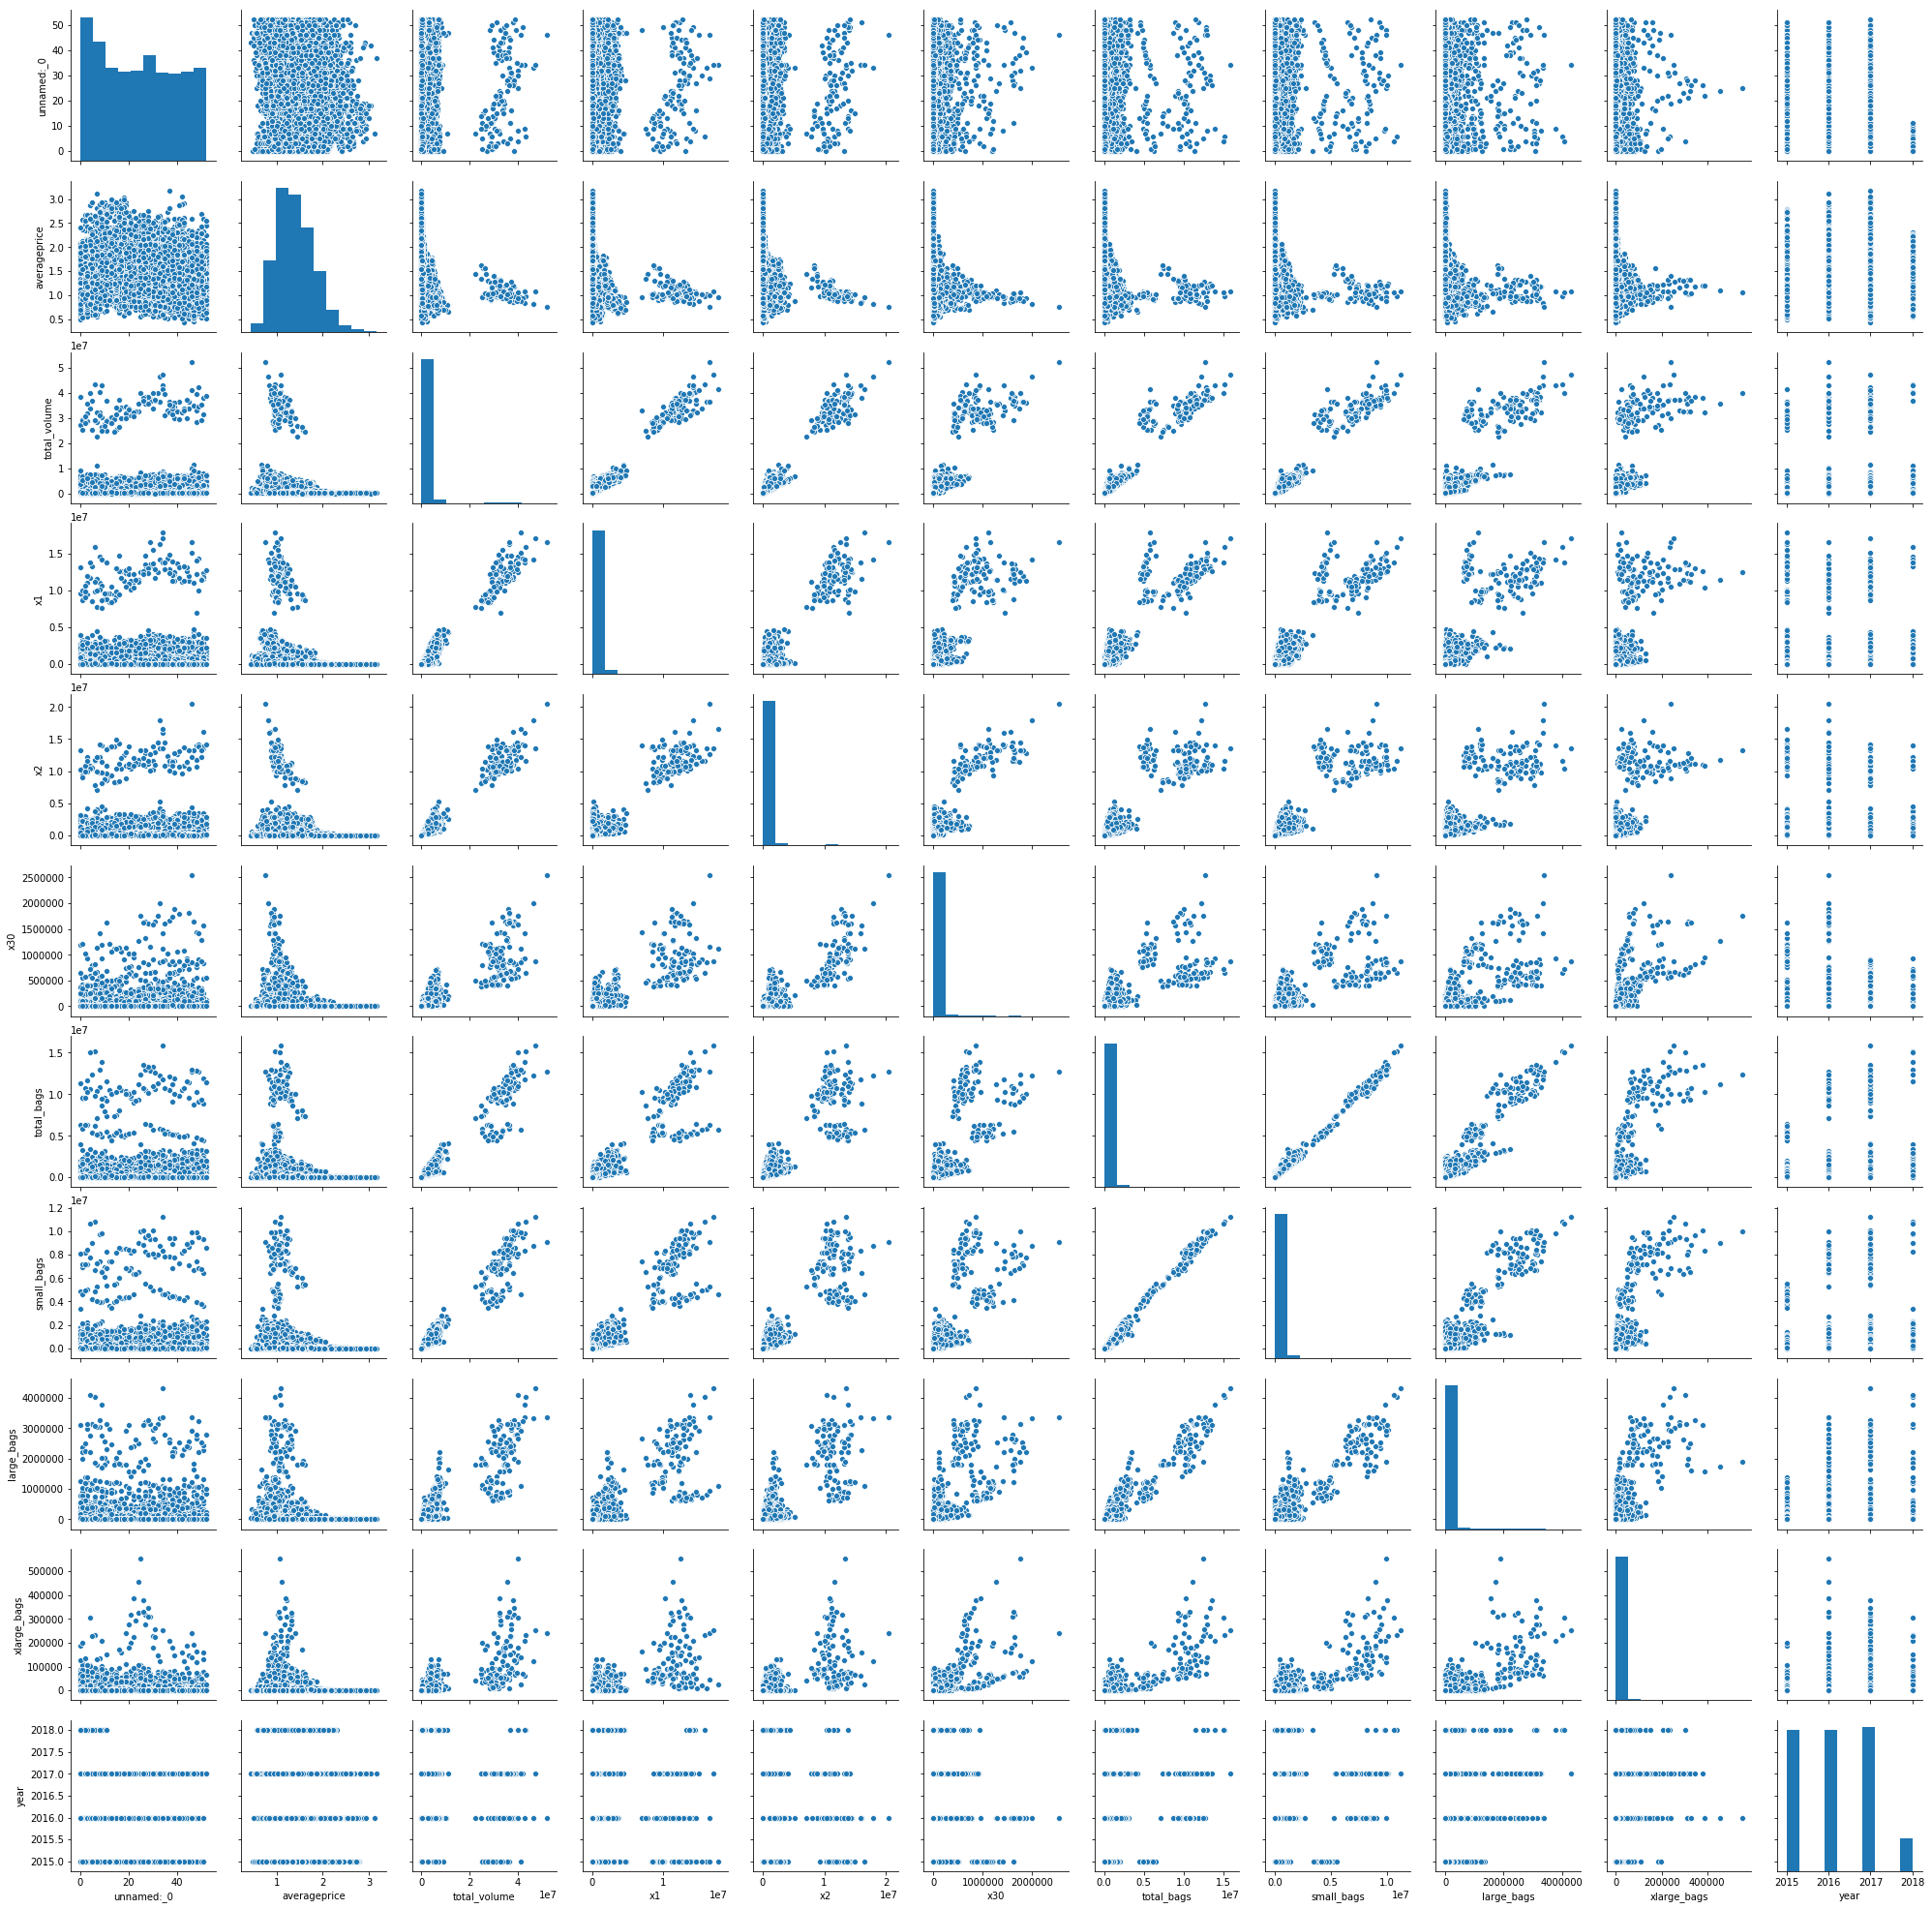

In [53]:
sns.pairplot(X_train)

In [54]:
corr['averageprice'].sort_values(ascending=False)

averageprice    1.000000
year            0.090205
xlarge_bags    -0.119171
unnamed:_0     -0.124990
x2             -0.174838
large_bags     -0.175513
small_bags     -0.178355
x30            -0.180054
total_bags     -0.180445
total_volume   -0.196232
x1             -0.213713
Name: averageprice, dtype: float64

# variables catégoriques

In [55]:
#sélectionner les vars non numériques et afficher les détails des colonnes
categorical=X_train.select_dtypes(exclude=[np.number])
categorical.describe()

,type,region
count,12774,12774
unique,2,54
top,conventional,Southeast
freq,6407,253


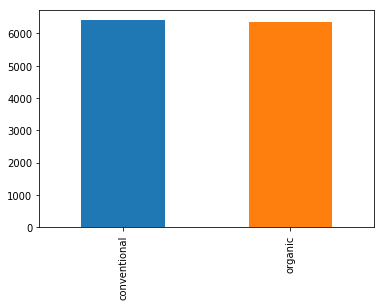

In [56]:
# comparer les classes d'un categorical feature:type
X_train['type'].value_counts().plot.bar()

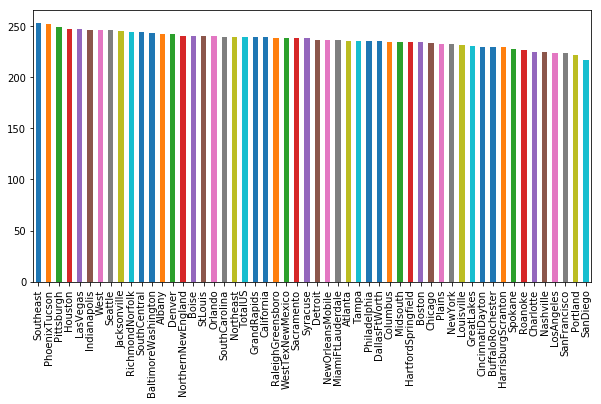

In [58]:
# comparer les classes d'un categorical feature:region
plt.figure(figsize=(10,5))
X_train['region'].value_counts().plot.bar()

In [59]:
#notre modèle a besoin de données numériques, nous allons donc utiliser One hot encoding pour transformer les données
X_train['enco_type'] = pd.get_dummies(X_train.loc[:,'type'], drop_first=True)
X_test['enco_type'] = pd.get_dummies(X_test.loc[:,'type'], drop_first=True)
# use pd.concat to join the new columns with your original dataframe
X_train = pd.concat([X_train,pd.get_dummies(X_train['region'], prefix='country')],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['region'], prefix='country')],axis=1)
X_train

,unnamed:_0,averageprice,total_volume,x1,x2,x30,total_bags,small_bags,large_bags,xlarge_bags,...,country_SouthCarolina,country_SouthCentral,country_Southeast,country_Spokane,country_StLouis,country_Syracuse,country_Tampa,country_TotalUS,country_West,country_WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-14,10,0.95,1316347.07,548774.22,292561.60,6066.33,468944.92,355573.55,113294.70,76.67,...,0,0,0,0,0,0,0,0,0,0
2016-08-14,19,1.14,83933.43,24615.83,16234.66,2321.26,40761.68,40759.30,0.00,2.38,...,0,0,0,1,0,0,0,0,0,0
2017-07-16,24,1.17,267806.51,89083.09,79805.02,1830.85,97087.55,90560.26,2757.35,3769.94,...,0,0,0,0,0,0,0,0,0,0
2015-07-05,25,0.99,4295280.16,2713600.49,592279.23,97111.62,892288.82,621425.86,270807.26,55.70,...,0,0,1,0,0,0,0,0,0,0
2015-07-05,24,1.58,13816.71,6430.36,4300.00,0.00,3086.35,2744.50,341.85,0.00,...,0,0,0,0,0,0,0,0,0,1
2016-01-24,48,1.16,1261352.88,360743.21,518203.05,16918.87,365487.75,315428.95,47910.39,2148.41,...,0,0,0,0,0,0,0,0,0,0
2016-10-23,9,1.85,584275.61,56864.06,336433.69,27036.54,163941.32,163070.93,382.89,487.50,...,0,0,0,0,0,0,0,0,0,0
2015-07-12,24,1.84,4614.82,585.84,1449.20,538.65,2041.13,1609.25,431.88,0.00,...,1,0,0,0,0,0,0,0,0,0
2015-09-27,13,1.10,467791.95,159459.18,152002.76,10158.38,146171.63,146143.41,13.28,14.94,...,0,0,0,0,0,0,0,0,0,0


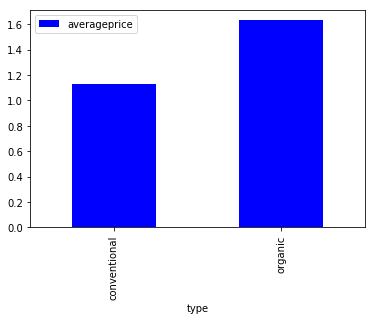

In [60]:
#visualiser plus facilement ce tableau croisé , nous pouvons créer un graphique à barres : variable' type'
condition_pivot = X_train.pivot_table(index='type', values='averageprice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

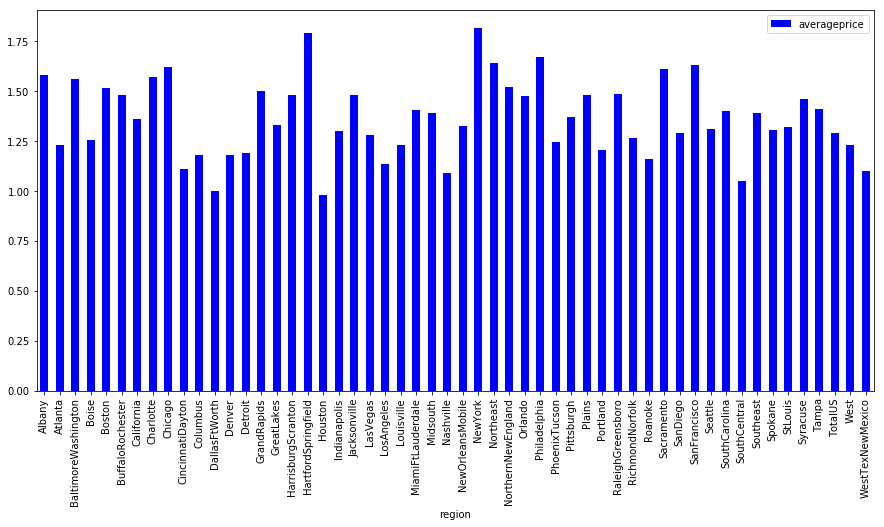

In [61]:
#pareil pour le variable 'region'
condition_pivot2 = X_train.pivot_table(index='region', values='averageprice', aggfunc=np.median)
condition_pivot2.plot(kind='bar', color='blue',figsize=(15,7))

In [62]:
# supprimer lev cat vars
X_train=X_train.drop(['type','region'],axis=1)
X_test=X_test.drop(['type','region'],axis=1)

# Créer un modèle linéaire

In [63]:
# séparer la cible des variables explicatives pour la modélisation
y_train=X_train.averageprice
X_train=X_train.drop(['unnamed:_0','averageprice'],axis=1)
y_test=X_test.averageprice
X_test=X_test.drop(['unnamed:_0','averageprice'],axis=1)


### Metrics d'évaluation

In [64]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print("R^2 is: ", model.score(X_test, y_test))
    print('mae', np.mean(errors))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    
    return accuracy

In [65]:
# tester avec la fonction np.log(x)
#y_train1=np.log(y_train+1)
#y_test1=np.log(y_test+1)

In [66]:
#Créez d'abord un modèle de régression linéaire.
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train.values)

In [67]:
# La valeur r au carré est une mesure de la proximité des données avec la droite de régression ajustée
# une valeur r au carré plus élevée signifie un meilleur ajustement (très proche de la valeur 1)
'R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), model.score(X_test, y_test))
# on vois bien q R^2 n'est pas trés elevé

'R^2 Training Score: 0.56 \nR^2 Validation Score: 0.55'

### évaluer le modèle

In [68]:
#Evaluate the performance and visualize results
plt.figure(figsize=(13,7))
predictions = model.predict(X_test)
#n=len(predictions)
#plt.scatter(np.arange(n),y_test)
print('RMSE is: \n', np.sqrt(mean_squared_error(y_test, predictions)))
evaluate(model,X_test,y_test)


RMSE is: 
 0.26962641999566817
Model Performance
R^2 is:  0.5494037724657419
mae 0.2025148169530556
Average Error: 0.2025 degrees.
Accuracy = 84.63%.


84.6337907633526

<Figure size 936x504 with 0 Axes>

In [69]:
evaluate(model,X_test,y_test)

Model Performance
R^2 is:  0.5494037724657419
mae 0.2025148169530556
Average Error: 0.2025 degrees.
Accuracy = 84.63%.


84.6337907633526

In [70]:
model.coef_

array([ 2.67410573e-05, -2.67365238e-05, -2.67489255e-05, -2.68194439e-05,
       -3.28141393e-02,  3.27873906e-02,  3.27873339e-02,  3.27888875e-02,
        3.73522521e-02,  4.93119557e-01,  1.53437182e-01, -6.69390290e-02,
        1.20432899e-01, -3.35999561e-02,  1.02431056e-01,  1.11643049e-01,
       -2.00407727e-02,  2.04160966e-01,  1.69003476e-01, -1.99654119e-01,
       -1.58310113e-01, -3.25886501e-01, -1.64499778e-01, -1.35683828e-01,
        1.04813813e-01, -9.11637904e-02,  1.03672272e-01,  3.92310192e-01,
       -3.51603457e-01, -9.25475866e-02,  1.05253931e-01, -2.22486230e-02,
       -2.01433383e-01, -1.25325365e-01,  1.16433391e-02, -3.92709467e-03,
       -1.82185356e-01, -1.04234973e-01,  3.27992823e-01,  2.12753687e-01,
        6.80134695e-02,  1.12340896e-01,  2.38094857e-01, -1.73406823e-01,
       -4.03633381e-02,  2.44118657e-02, -9.14625806e-02,  1.49646391e-01,
       -1.28241579e-01, -1.51562984e-01,  2.13608978e-01,  4.75680158e-03,
        3.81209200e-01,  

### Créez un diagramme de dispersion des valeurs de test réelles par rapport aux valeurs prédites.

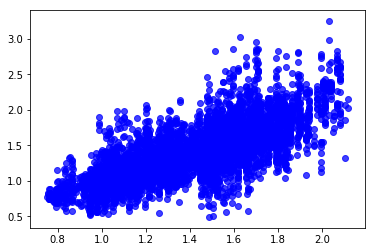

In [71]:
#visualiser graphiquement cette relation entre les prévisions et les valeurs réelles avec un nuage de points.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=0.75,
            color='b')

### améliorer le modèle

Text(0, 0.5, 'Actual Price')

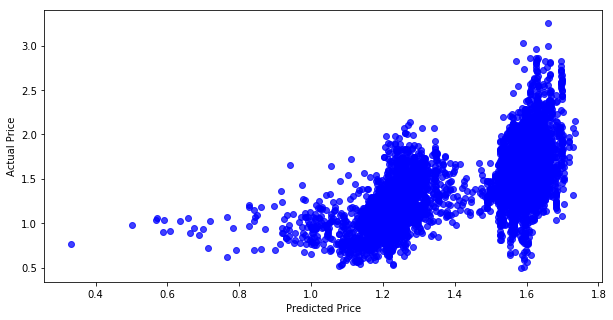

In [72]:
#essayez d'utiliser Ridge Regularization
i=3
plt.figure(figsize=(10,5))
alpha = 10**i
rm = linear_model.Ridge(alpha=alpha)
ridge_model = rm.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_test)

plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')


In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [74]:
type(X_train)

pandas.core.frame.DataFrame

In [75]:
#essayer une adaptation polynomiale
#def PolynomialRegression(degree, **kwargs):
 #   return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
#for degree in [3]:
  #  pred = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)
   # print('RMSE is: \n', mean_squared_error(y_test, pred))

# Créer un modèle de RandomForestRegressor

In [76]:
# Fitting Random Forest Regression to the dataset 
# importer the regressor 

from sklearn.ensemble import RandomForestRegressor 

 # create regressor object 

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [77]:
RF_pred = regressor.predict(X_test)
evaluate(regressor,X_test,y_test)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Test Score: {:.2f}'.format(regressor.score(X_train, y_train), 
                                                                                             regressor.oob_score_,
                                                                                             regressor.score(X_test, y_test)))

Model Performance
R^2 is:  0.8540494942284006
mae 0.10758966210045644
Average Error: 0.1076 degrees.
Accuracy = 92.06%.
R^2 Training Score: 0.98 
OOB Score: 0.85 
R^2 Test Score: 0.85


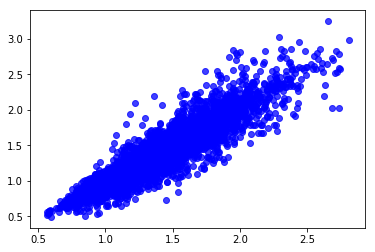

In [78]:
actual_values = y_test
plt.scatter(RF_pred, actual_values, alpha=0.75,
            color='b')

# importance des variables

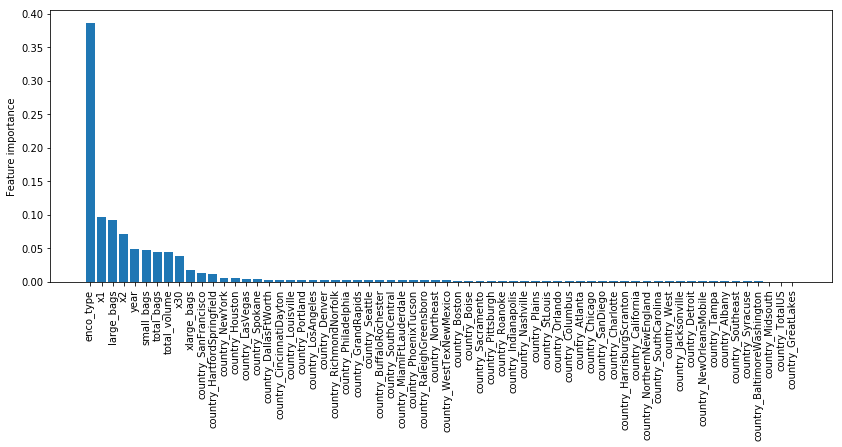

In [80]:
plt.figure(figsize=(14,5))
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices])
names = [X_train.columns[i] for i in indices]
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.ylabel('Feature importance')

# Show plot
plt.show()

### Optimisation du modèle

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
rf.get_params()

Parameters currently in use:



{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 800, 1400, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 43, 76, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [200, 800, 1400, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 43, 76, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

### évaluer le modèle

In [86]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
R^2 is:  0.8556364293468328
mae 0.10695305675146768
Average Error: 0.1070 degrees.
Accuracy = 92.11%.


### Faire une soumission

In [87]:
submission = pd.DataFrame()
submission['Date'] = X_test.index

In [88]:
pred=best_random.predict(X_test)
submission['AveragePrice']=pred

In [92]:
submission.to_csv('submission_BAOUDENE_YOUSSEF.csv', index=False)